<html>
    <body>
        <h1 class="alert alert-info" style="text-align: center;">Surviving the Titanic: A Machine Learning Approach to Predicting Passenger Survival</h1>
        <h2 id="contents">Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1_1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section1_2"><li type="i">Bivariate analysis</li></a>
            </ol>        
            <a href="#section5"><li>Data Prepocessing</li></a>
            <a href="#section6"><li>Model Building and Evaluation</li></a>
            <ol>
                <a href="#sub_section2_1"><li type="i">KNN Classifier</li></a>
                <a href="#sub_section2_2"><li type="i">Logistic Regreassion</li></a>
                <a href="#sub_section2_3"><li type="i">Decision Tree Classifier</li></a>
                <a href="#sub_section2_4"><li type="i">MPLC Classifier</li></a>
                <a href="#sub_section2_5"><li type="i">Support Vector Machine</li></a>
            </ol> 
        </ol>
    </body>
</html>

<div class="col-md-8">
    <h2 id="section1">1. Importing libraries and loading the dataset</h2>
    <p>Let's start by importing the necessary libraries and loading the dataset.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import re

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')

In [2]:
# Read the data
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_submission  = pd.read_csv('../input/titanic/gender_submission.csv')

<div class="col-md-8">
    <h2 id="section2">2. Exploring the dataset</h2>
    <p>Let's explore the datasets:</p>
</div>
<div class="col-md-4">
    <a href="#contens">Back to top</h2>
</div>

In [3]:
# Shape of the data
print('Shape of the train data: %s', df_train.shape)
print('Shape of the test data: %s', df_test.shape)
print('Shape of the submission data: %s', df_submission.shape)

Shape of the train data: %s (891, 12)
Shape of the test data: %s (418, 11)
Shape of the submission data: %s (418, 2)


In [4]:
# Sample train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Smaple of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Sample submission data
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p>Let's explore the train dataset to get a better understanding of its structure and content:</p>

In [7]:
# Data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Unique values in each column
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<div class="col-md-8">
    <h3 id="section3">3. Data cleaning</h3>
    <p>Nice! We have a dataset with <b>891</b> rows and <b>12</b> columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [10]:
# Let's create a copy of the train and test data to perform data cleaning
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [11]:
# Missing values in train data
df_train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Missing values in test data
df_test_copy.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<p>We have ver high number of missing values in <b>Cabin</b> followed by <b>Age</b> and just 2 in <b>Embarked</b> column.</p>
<p>Lets impute missing values in <b>Embarked</b> column by mode. and check the other columns if they have any patterns</p>

In [13]:
# Impute missing values in Age column with median
# df_train_copy['Age'] = df_train_copy['Age'].fillna(df_train_copy['Age'].median())
# df_test_copy['Age'] = df_test_copy['Age'].fillna(df_test_copy['Age'].median())

# Impute missing values in Embarked column with mode
df_train_copy['Embarked'] = df_train_copy['Embarked'].fillna(df_train_copy['Embarked'].mode()[0])
df_test_copy['Embarked'] = df_test_copy['Embarked'].fillna(df_test_copy['Embarked'].mode()[0])


<p>Here empty values in <b>Cabin</b> column may indicate that passenger didn't have a cabin. So we can explore further if emplty values in cabin has relation with Survived</p>

In [14]:
# Check if there is any relations between the missing values in Cabin column and Survived column
df_train_copy[df_train_copy['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

<p>We can clearly see that passengers with empty values in <b>Cabin</b> column have less chance of survival.</p>
<p>Cabin has signficant effect on Survival soo let's create a new category for the missing Cabins called "Missing"</p>

In [33]:
# Impute missing values in Cabin column with 'Missing'
df_train_copy['Cabin'] = df_train_copy['Cabin'].fillna('Missing')
df_test_copy['Cabin'] = df_test_copy['Cabin'].fillna('Missing')

<p>Now let's check what variable can impact Age. In the Name column we can see the Initial which can give some information about the Age, let's extract that.</p>

In [40]:
# Let's extract the name title from the Name column
df_train_copy['Name_Title'] = df_train_copy['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df_test_copy['Name_Title'] = df_test_copy['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

df_train_copy['Name_Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name_Title, dtype: int64

In [107]:
# Let's combine the similar titles, we will combine Mlle, Jonkheer and Ms with Miss, Mme, Countess and Lady with Mrs and Rev, Dr, Col, Major, Don, Sir, Capt with Rare
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Mlle', 'Ms', 'Jonkheer'], 'Miss')
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'Don', 'Sir', 'Capt'], 'Rare')

df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Mlle', 'Ms', 'Jonkheer'], 'Miss')
df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'Don', 'Sir', 'Capt'], 'Rare')

df_train_copy['Name_Title'].value_counts()

Mr        517
Miss      186
Mrs       128
Master     40
Rare       20
Name: Name_Title, dtype: int64

In [108]:
# Now let's see the Age of the passengers with respect to their Name_Title
df_train_copy.groupby('Name_Title')['Age'].median()

Name_Title
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Rare      49.0
Name: Age, dtype: float64

In [109]:
# Great, now let's impute the missing values in Age column with the median of the respective Name_Title
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Master'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Master']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Mr'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Mr']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Mrs'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Mrs']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Miss'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Miss']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Rare'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Rare']['Age'].median()

df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Miss'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Miss']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Mr'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Mr']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Mrs'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Mrs']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Master'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Master']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Rare'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Rare']['Age'].median()


In [110]:
# Let see if we still have any missing values in the train data
df_train_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Name_Title     0
log_Fare       0
dtype: int64

In [111]:
# Imputing missing values in Fare column with median in test data
df_test_copy['Fare'] = df_test_copy['Fare'].fillna(df_test_copy['Fare'].median())

# Let see if we still have any missing values in test data
df_test_copy.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Name_Title     0
dtype: int64

In [112]:
# Check for duplicates in train data
df_train_copy.duplicated().sum()

0

In [113]:
# Check for duplicates in test data
df_test_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<p>Let's convert Survived, Pclass, Sex, SibSp, Parch, and Embarked to categorical variables.</p>

In [114]:
# Convert Name, Survived, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in train data
df_train_copy['Survived'] = df_train_copy['Survived'].astype('category')
df_train_copy['Pclass'] = df_train_copy['Pclass'].astype('category')
df_train_copy['Sex'] = df_train_copy['Sex'].astype('category')
df_train_copy['SibSp'] = df_train_copy['SibSp'].astype('category')
df_train_copy['Parch'] = df_train_copy['Parch'].astype('category')
df_train_copy['Embarked'] = df_train_copy['Embarked'].astype('category')
df_train_copy['Ticket'] = df_train_copy['Ticket'].astype('category')
df_train_copy['Cabin'] = df_train_copy['Cabin'].astype('category')
df_train_copy['Name'] = df_train_copy['Name'].astype('category')


In [115]:
# Convert Name, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in test data
df_test_copy['Pclass'] = df_test_copy['Pclass'].astype('category')
df_test_copy['Sex'] = df_test_copy['Sex'].astype('category')
df_test_copy['SibSp'] = df_test_copy['SibSp'].astype('category')
df_test_copy['Parch'] = df_test_copy['Parch'].astype('category')
df_test_copy['Embarked'] = df_test_copy['Embarked'].astype('category')
df_test_copy['Ticket'] = df_test_copy['Ticket'].astype('category')
df_test_copy['Cabin'] = df_test_copy['Cabin'].astype('category')
df_test_copy['Name'] = df_test_copy['Name'].astype('category')

<div class="col-md-8">
    <h3 id="section4">4. Exploratory data analysis</h3>
    <p>Let's perform exploratory data analysis to extract insights from the cab trips dataset:</p>
    <h4 id="sub_section1_1" >i. Univariate analysis</h4>
    <p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [116]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [117]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here Survived column is our target variable. Let's explore its distribution.</p>

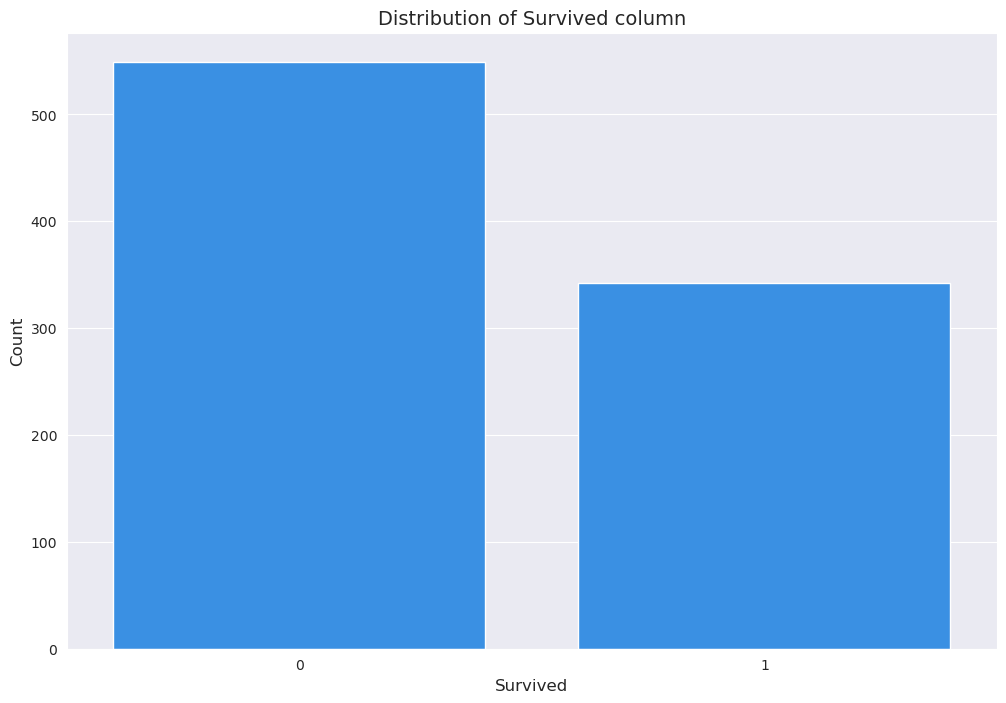

In [118]:
# Plot distribution of Survived column
plot_cat(df_train_copy, 'Survived', 'Survived', 'Count', 'Distribution of Survived column')

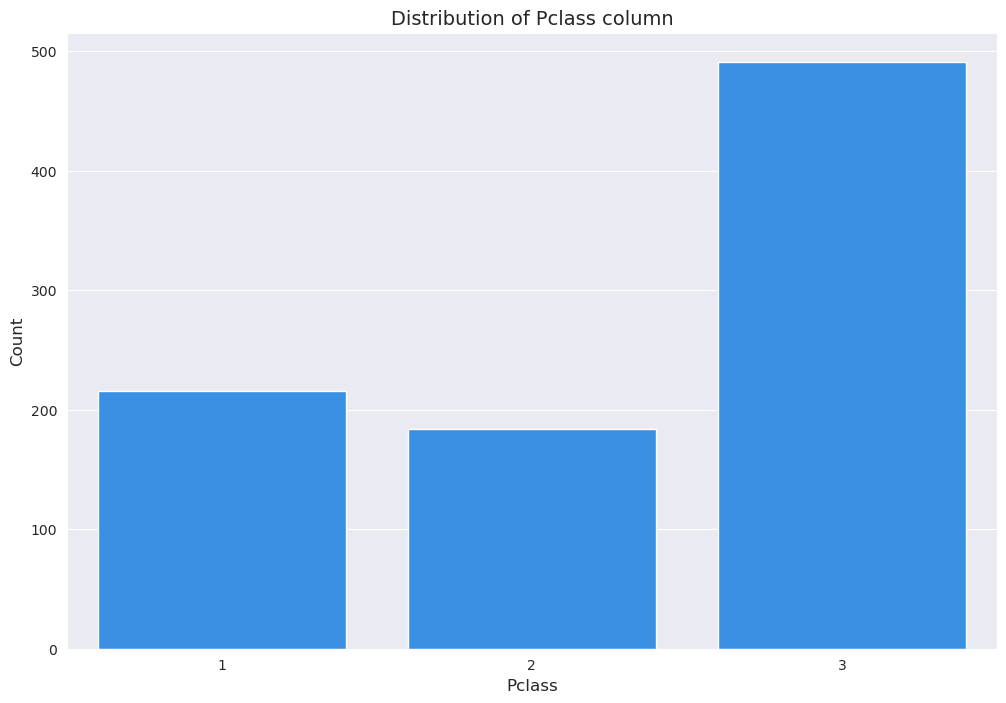

In [119]:
# Plotting distribution of Pclass column
plot_cat(df_train_copy, 'Pclass', 'Pclass', 'Count', 'Distribution of Pclass column')

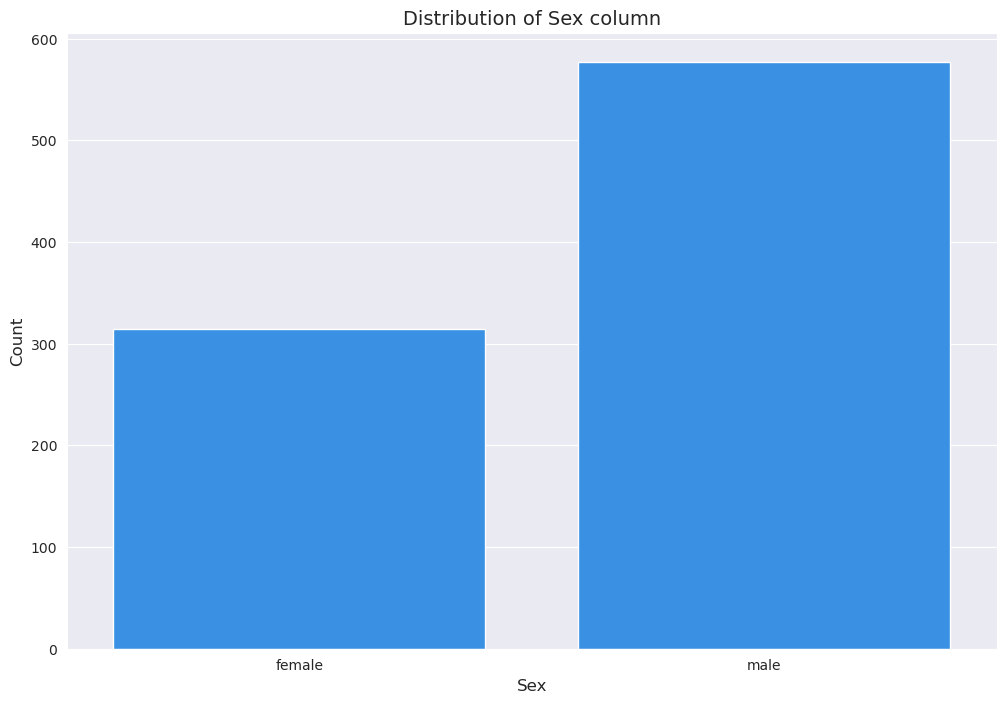

In [120]:
# Plotting distribution of Sex column
plot_cat(df_train_copy, 'Sex', 'Sex', 'Count', 'Distribution of Sex column')

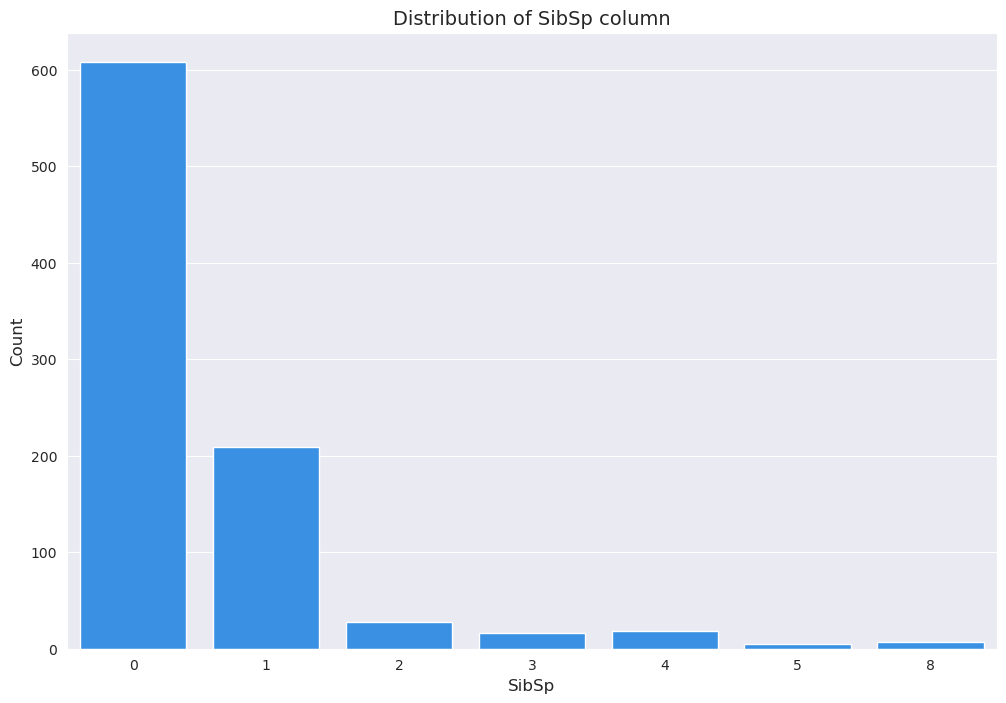

In [121]:
# Plottting distribution of SibSp column
plot_cat(df_train_copy, 'SibSp', 'SibSp', 'Count', 'Distribution of SibSp column')

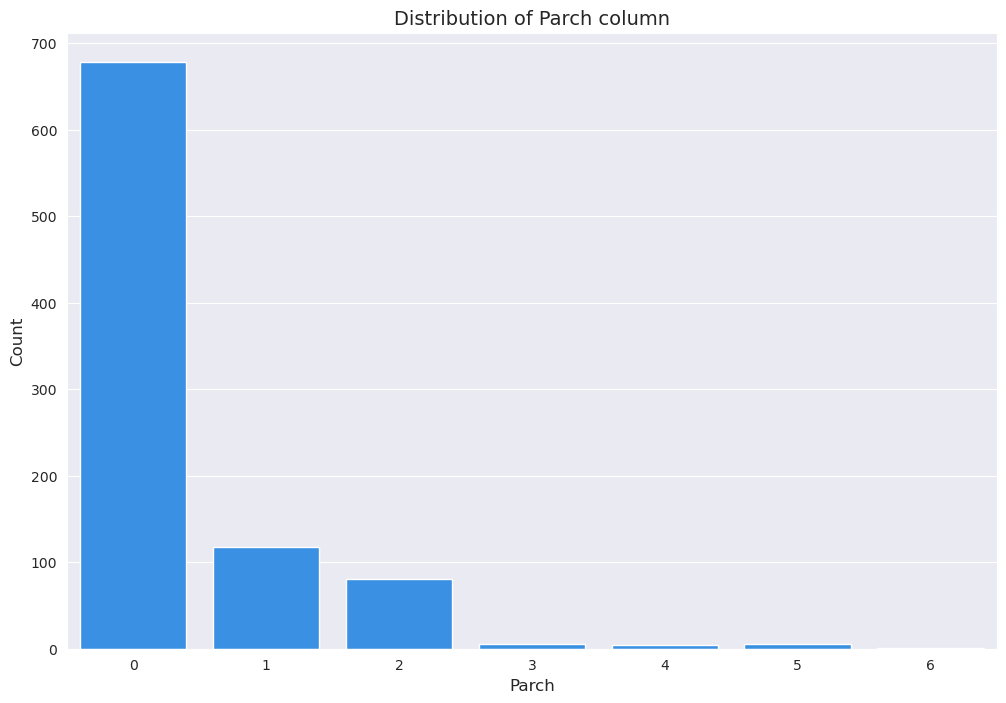

In [122]:
# Plottting distribution of Parch column
plot_cat(df_train_copy, 'Parch', 'Parch', 'Count', 'Distribution of Parch column')

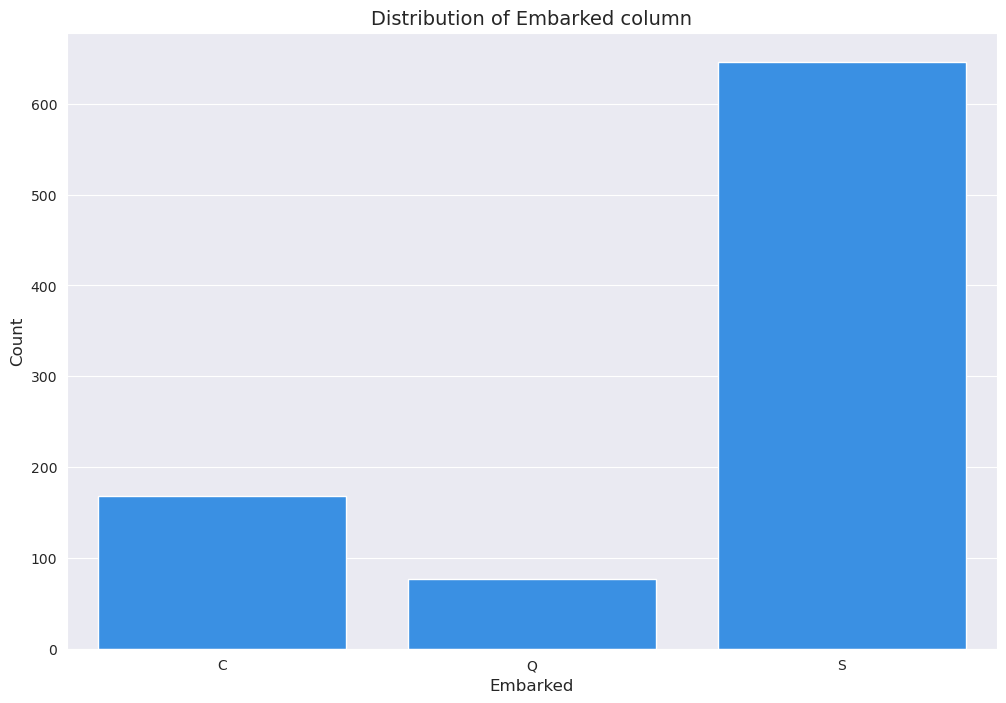

In [123]:
# Plottting distribution of Embarked column
plot_cat(df_train_copy, 'Embarked', 'Embarked', 'Count', 'Distribution of Embarked column')

<p>Lets explore the distribution of numerical variables.</p>

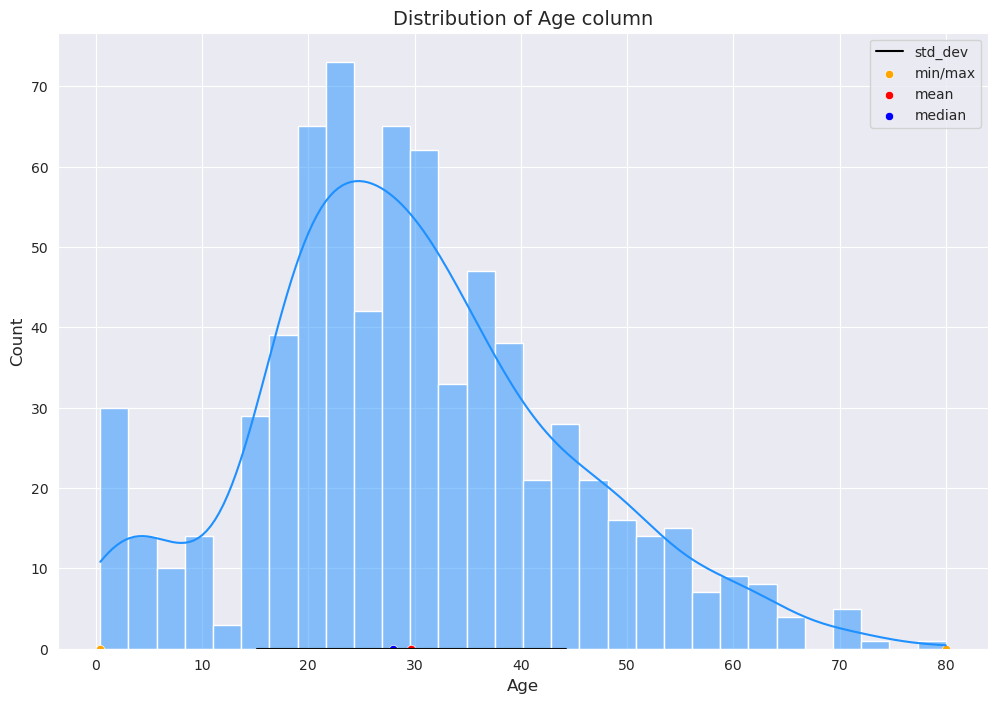

Statistics,Value
Minimum Value,0.42
Maximum Value,80
Range,79.58
Mean,29.6991
Median,28
Standard Deviation,14.5265
Skewness,0.389108
Kurtosis,0.178274


In [124]:
# Plotting distribution of Age column
plot_dist(df_train, 'Age', 'Age', 'Count', 'Distribution of Age column')

<ul>
    <li>Median Age is 28.</li>
    <li>Mean and Median Age are almost same. So Age is normally distributed.</li>
</ul>

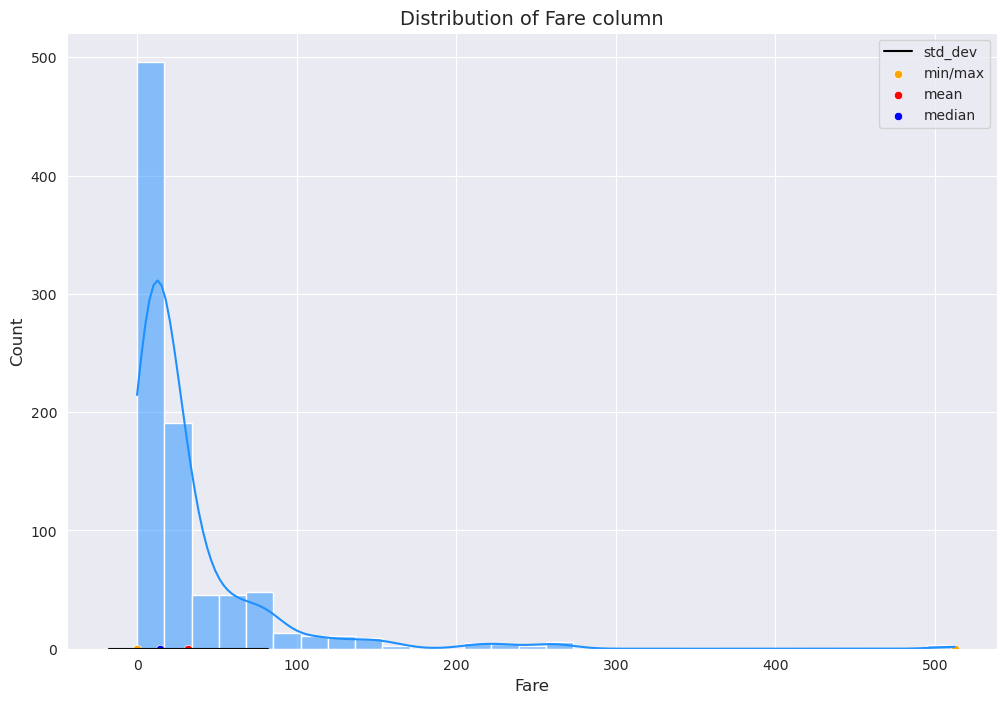

Statistics,Value
Minimum Value,0
Maximum Value,512.329
Range,512.329
Mean,32.2042
Median,14.4542
Standard Deviation,49.6934
Skewness,4.78732
Kurtosis,33.3981


In [125]:
# Let's see how Fare column is distributed
plot_dist(df_train, 'Fare', 'Fare', 'Count', 'Distribution of Fare column')

<p>Kurtosis of Fare is very high. So Fare is highly skewed.</p>
<p>Which is as expected, because certain classes will have higher fares than others and limited seats.</p>

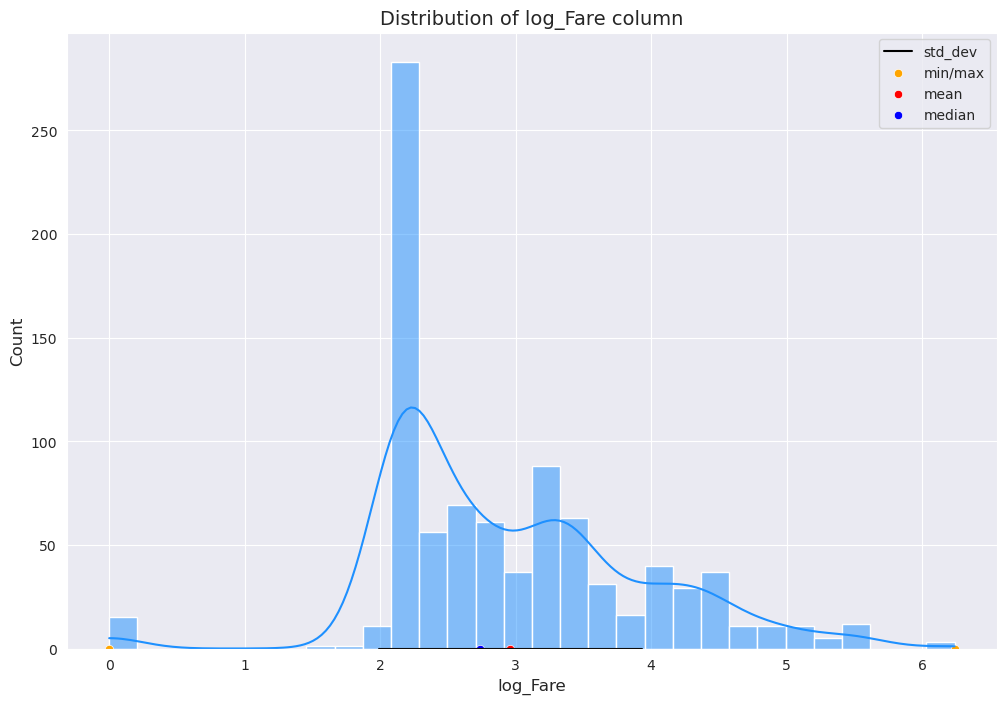

Statistics,Value
Minimum Value,0
Maximum Value,6.24092
Range,6.24092
Mean,2.96225
Median,2.73788
Standard Deviation,0.969048
Skewness,0.394928
Kurtosis,0.976142


In [175]:
# Let's create a new variable log_Fare by taking log of Fare column
df_train_copy['log_Fare'] = np.log(df_train_copy['Fare']+1)
df_test_copy['log_Fare'] = np.log(df_test_copy['Fare']+1)

# Plotting distribution of log_Fare column
plot_dist(df_train_copy, 'log_Fare', 'log_Fare', 'Count', 'Distribution of log_Fare column')

<div class="col-md-8">
    <h4 id="sub_section1_2">ii. Bivariate analysis</h4>
    <p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [127]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

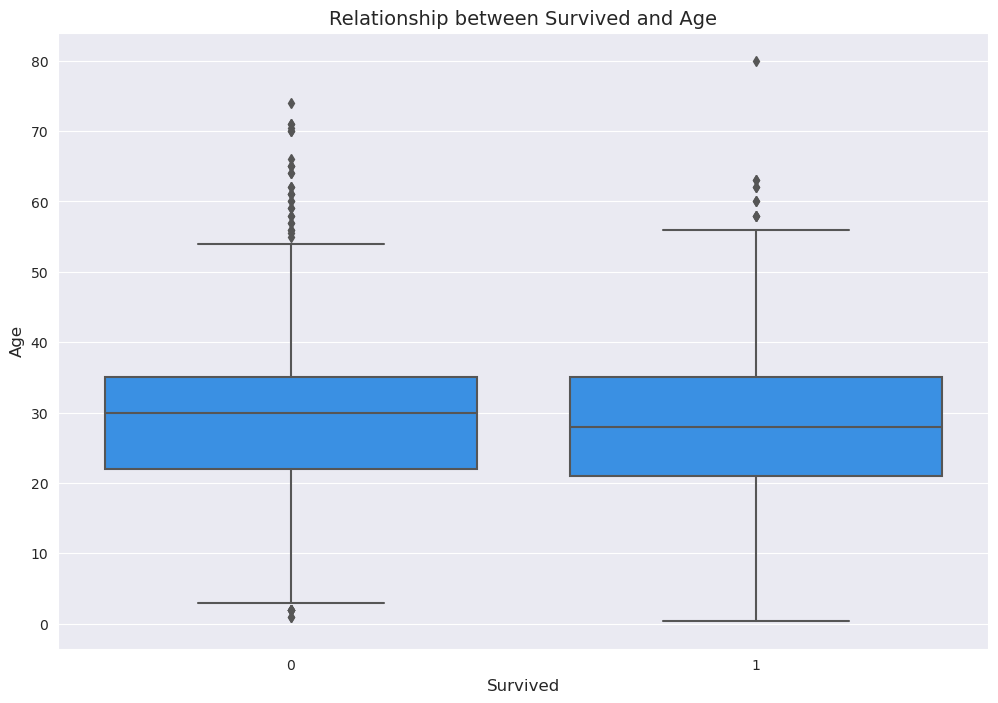

In [128]:
# Relationship between Survived and Age
plot_num_vs_target(df_train_copy, 'Age', 'Survived', 'Survived', 'Age', 'Relationship between Survived and Age')

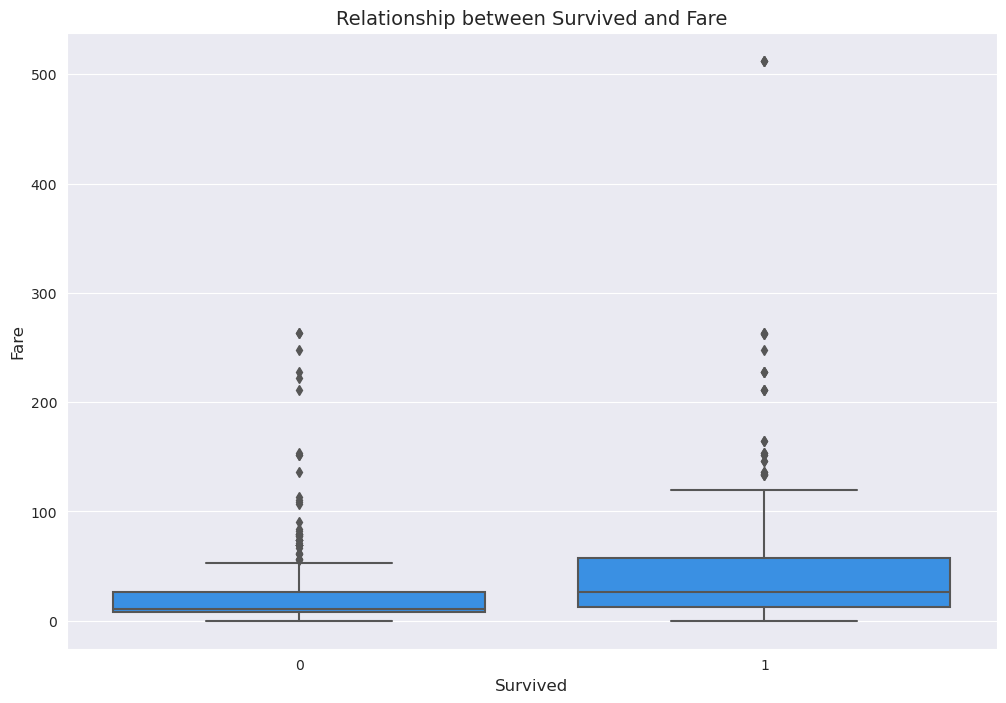

In [129]:
# Relationship between Survived and Fare
plot_num_vs_target(df_train_copy, 'Fare', 'Survived', 'Survived', 'Fare', 'Relationship between Survived and Fare')

In [130]:
# Function for plotting the distribution of categorical variables against the target variable
# Here target variable and categorical variable are assumed to be categorical
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, hue=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

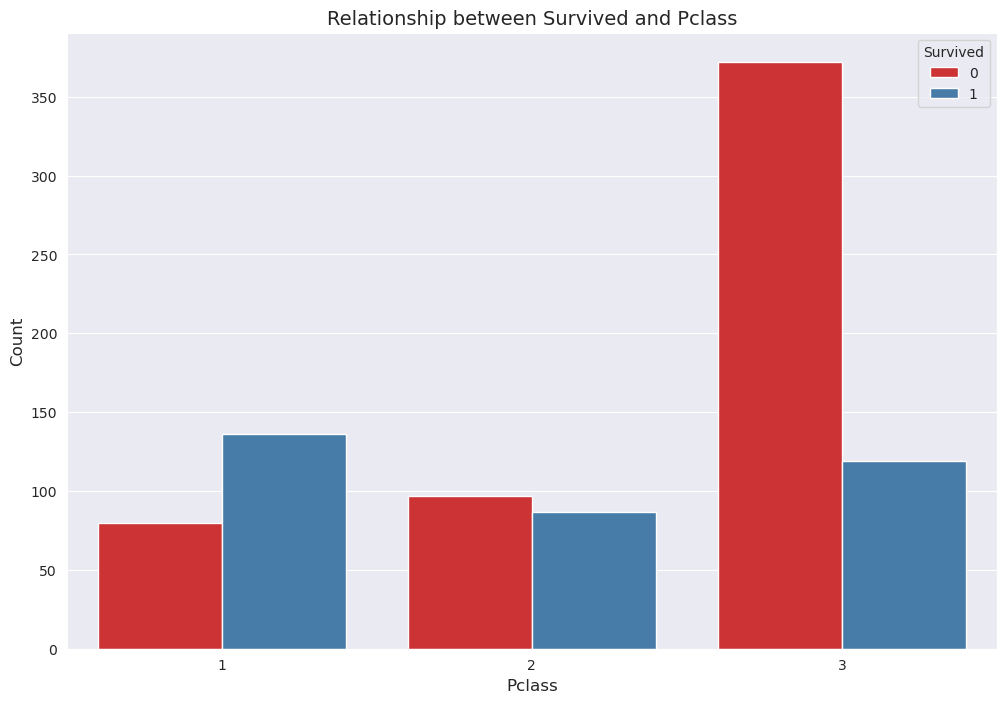

In [131]:
# Relationship between Survived and Pclass
plot_cat_vs_target(df_train_copy, 'Pclass', 'Survived', 'Pclass', 'Count', 'Relationship between Survived and Pclass')

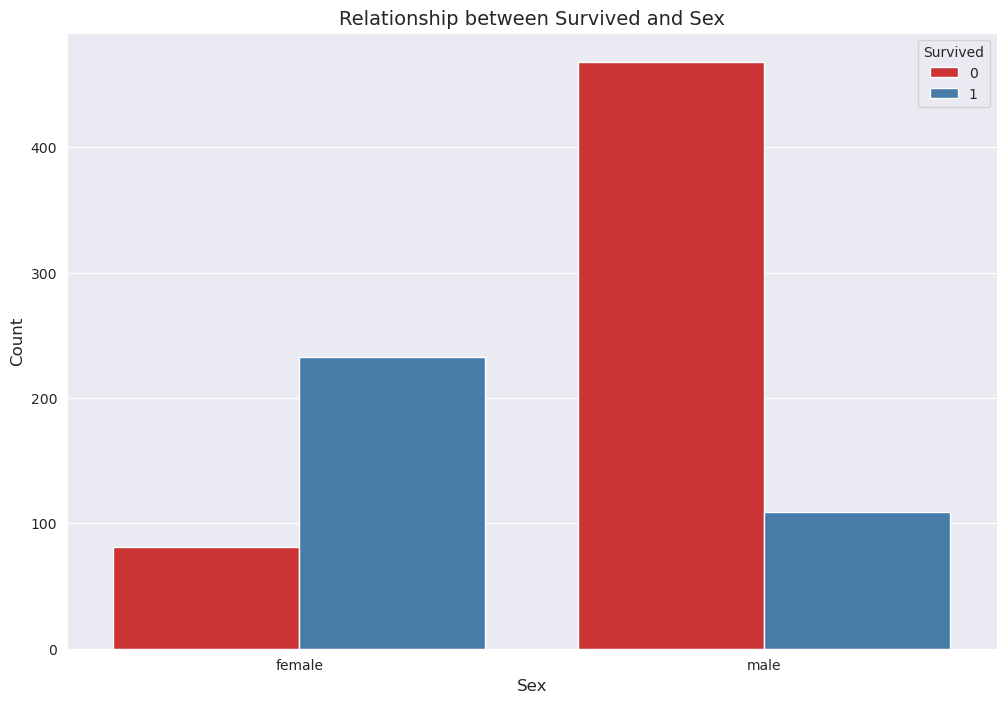

In [132]:
# Relationship between Survived and Sex
plot_cat_vs_target(df_train_copy, 'Sex', 'Survived', 'Sex', 'Count', 'Relationship between Survived and Sex')

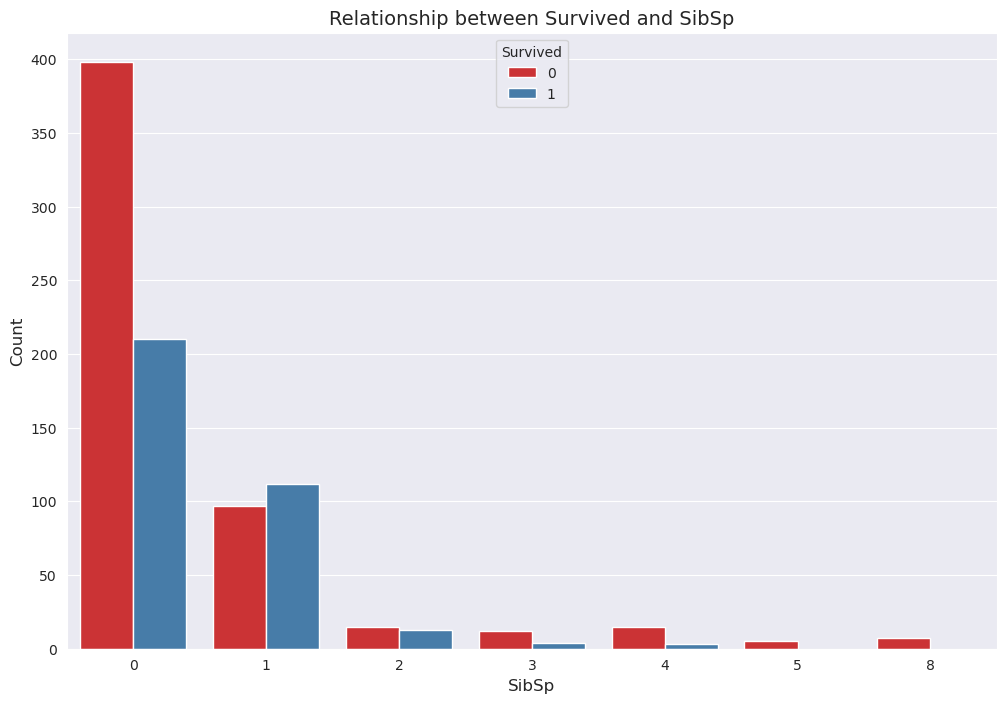

In [133]:
# Relationship between Survived and SibSp
plot_cat_vs_target(df_train_copy, 'SibSp', 'Survived', 'SibSp', 'Count', 'Relationship between Survived and SibSp')

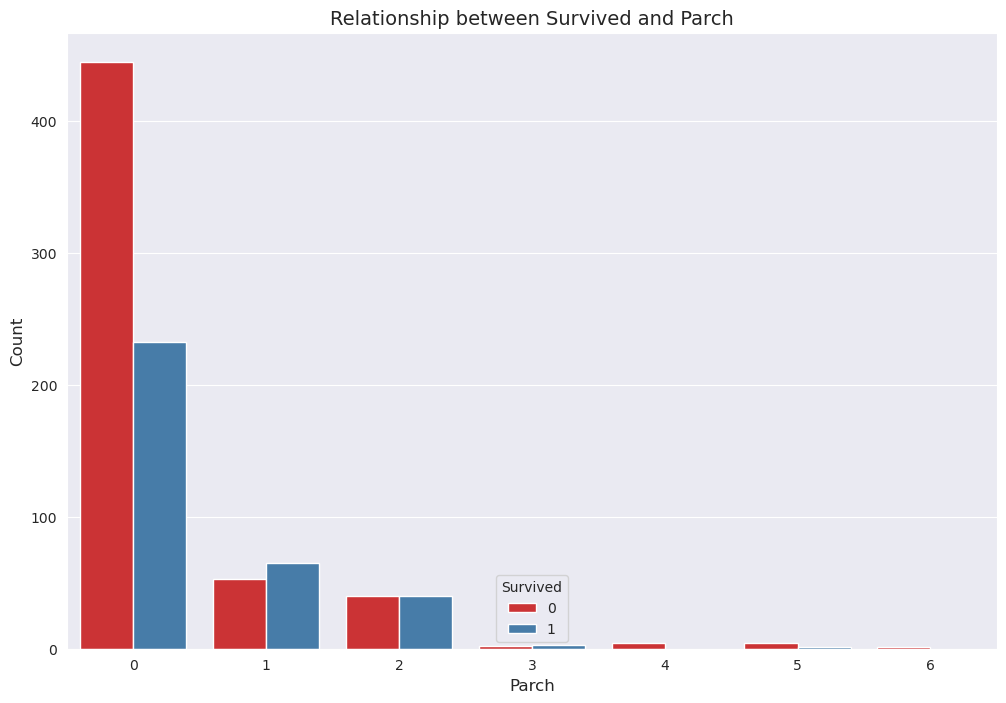

In [134]:
# Relationship between Survived and Parch
plot_cat_vs_target(df_train_copy, 'Parch', 'Survived', 'Parch', 'Count', 'Relationship between Survived and Parch')

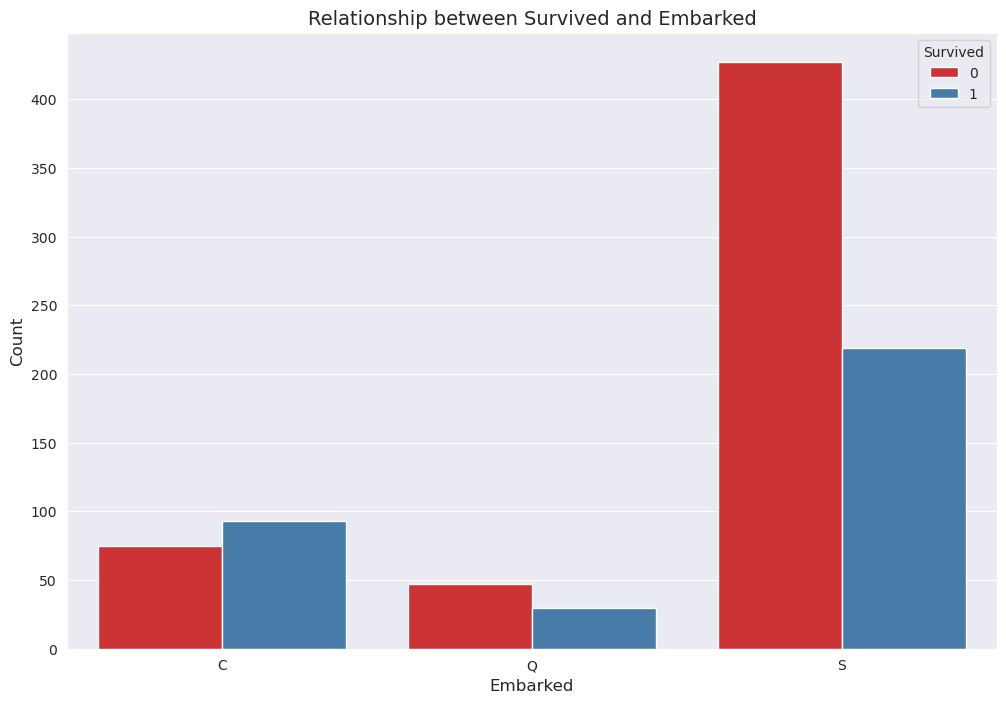

In [135]:
# Relationship between Survived and Embarked
plot_cat_vs_target(df_train_copy, 'Embarked', 'Survived', 'Embarked', 'Count', 'Relationship between Survived and Embarked')

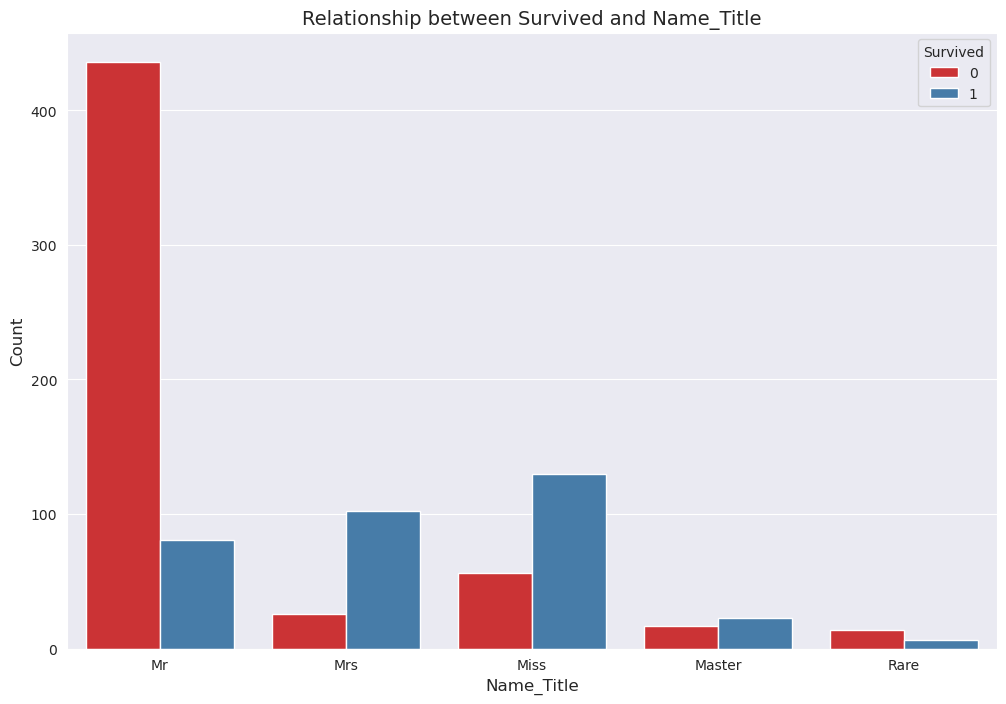

In [136]:
# Relationship between Survived and Name_Title
plot_cat_vs_target(df_train_copy, 'Name_Title', 'Survived', 'Name_Title', 'Count', 'Relationship between Survived and Name_Title')

In [299]:
# Let's create a variable Family_Size by adding SibSp and Parch
df_train_copy['Family_Size'] = df_train_copy['SibSp'].astype('int') + df_train_copy['Parch'].astype('int') + 1

df_test_copy['Family_Size'] = df_test_copy['SibSp'].astype('int') + df_test_copy['Parch'].astype('int') + 1

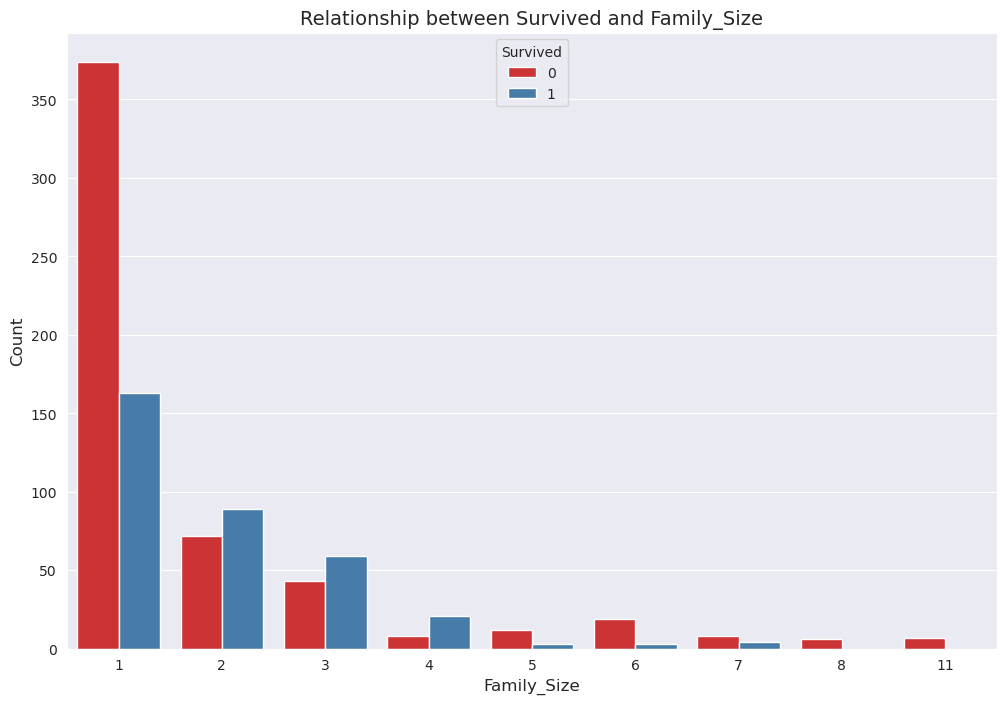

In [367]:
# Let's plot the relationship between Survived and Family_Size
plot_cat_vs_target(df_train_copy, 'Family_Size', 'Survived', 'Family_Size', 'Count', 'Relationship between Survived and Family_Size')

In [370]:
# Let's create a variable class from Cabin column by extracting the first character of the string
df_train_copy['Cabin_class'] = df_train_copy['Cabin'].astype('str').str[0]
df_test_copy['Cabin_class'] = df_test_copy['Cabin'].astype('str').str[0]
df_train_copy['Cabin_class'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_class, dtype: int64

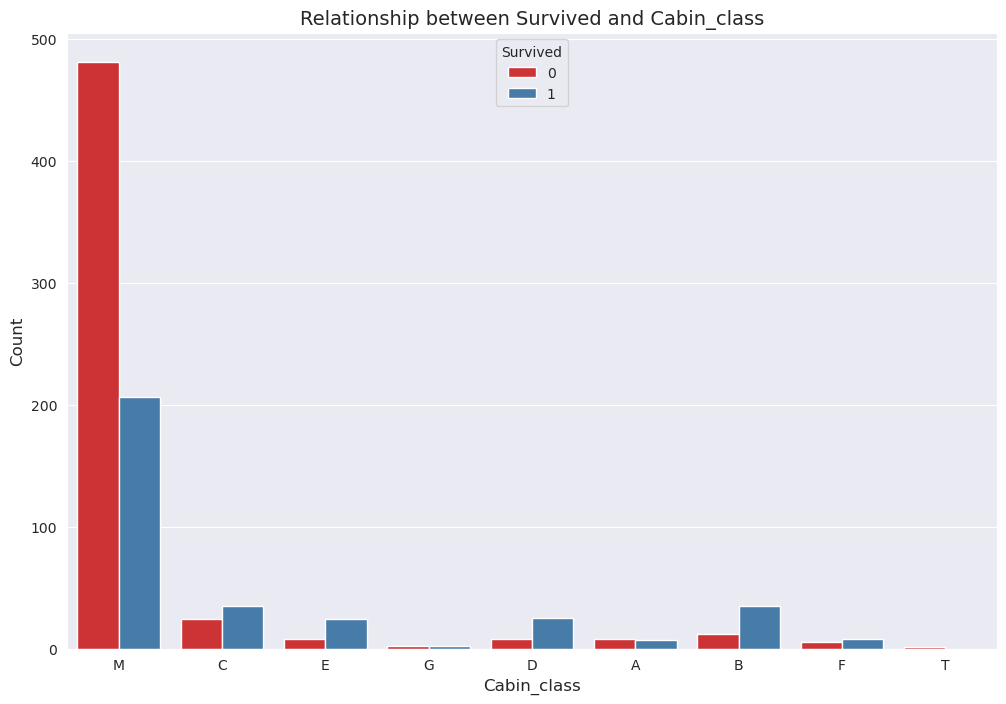

In [371]:
# Let's plot the relationship between Survived and Cabin_class
plot_cat_vs_target(df_train_copy, 'Cabin_class', 'Survived', 'Cabin_class', 'Count', 'Relationship between Survived and Cabin_class')

<div class="col-md-8">
    <h3 id="section5">5. Data Preprocessing</h3>
    <p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
    <ul>
        <li>One-hot encode categorical variables</li>
        <li>Lable encode categorical variables</li>
    </ul>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [373]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [497]:
# Let's check train data before encoding
# df_train_copy.Survived.value_counts(), df_train_copy.Pclass.value_counts(), df_train_copy.SibSp.value_counts(), df_train_copy.Parch.value_counts(), df_train_copy.Embarked.value_counts(), df_train_copy.Cabin.value_counts(), df_train_copy.Name_Title.value_counts()

In [498]:
# Let's check test data after encoding
# df_test_copy.Pclass.value_counts(), df_test_copy.SibSp.value_counts(), df_test_copy.Parch.value_counts(), df_test_copy.Embarked.value_counts(), df_test_copy.Cabin.value_counts(), df_test_copy.Name_Title.value_counts()

In [968]:
# Encoding variables in the training dataset and create a new dataframe called df_train_encoded
df_train_encoded = df_train_copy.copy()
df_train_encoded = encode_cat(df_train_encoded, 'Survived', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Cabin', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Pclass', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Sex', 'onehot')
df_train_encoded = encode_cat(df_train_encoded, 'SibSp', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Parch', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Embarked', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Name_Title', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Cabin_class', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Family_Size', 'label')


# Encoding variables in the test dataset and create a new dataframe called df_test_encoded
df_test_encoded = df_test_copy.copy()
df_test_encoded = encode_cat(df_test_encoded, 'Cabin', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Pclass', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Sex', 'onehot')
df_test_encoded = encode_cat(df_test_encoded, 'SibSp', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Parch', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Embarked', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Name_Title', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Cabin_class', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Family_Size', 'label')

In [969]:
# Let's check train data before encoding
# df_train_encoded.Survived.value_counts(), df_train_encoded.Pclass.value_counts(), df_train_encoded.SibSp.value_counts(), df_train_encoded.Parch.value_counts(), df_train_encoded.Embarked.value_counts(), df_train_encoded.Cabin.value_counts(), df_train_encoded.Name_Title.value_counts()

In [970]:
# Let's check train data before encoding
# df_test_encoded.Pclass.value_counts(), df_test_encoded.SibSp.value_counts(), df_test_encoded.Parch.value_counts(), df_test_encoded.Embarked.value_counts(), df_test_encoded.Cabin.value_counts(), df_test_encoded.Name_Title.value_counts()

<p>Now that we have preprocessed the variables, let's check the correlation between them:</p>

In [971]:
# Function to plot correlation between variables
def plot_corr(df, size=20):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

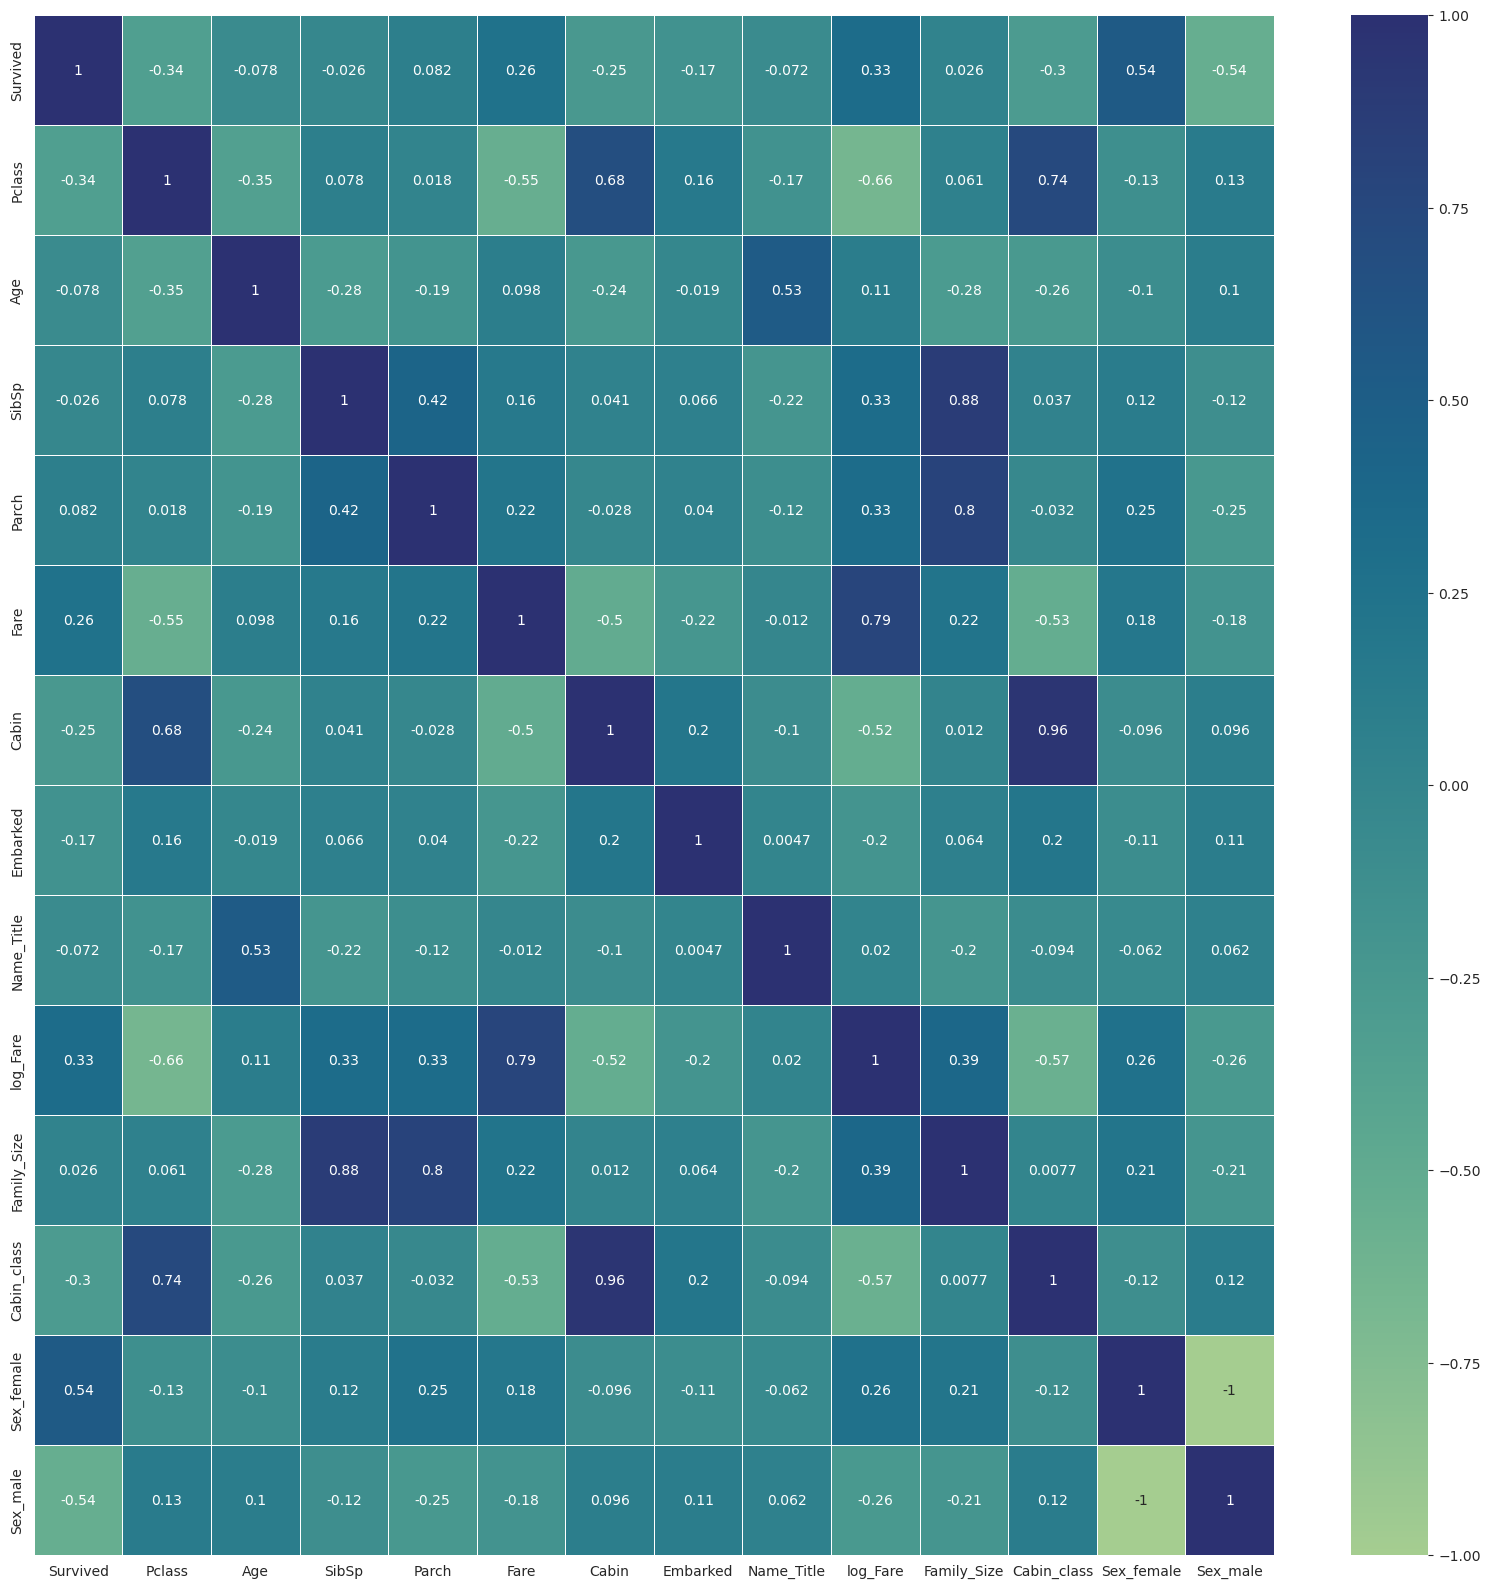

In [972]:
# Correlation between variables in the training set
plot_corr(df_train_encoded.drop(['PassengerId', 'Name', 'Ticket'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [973]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

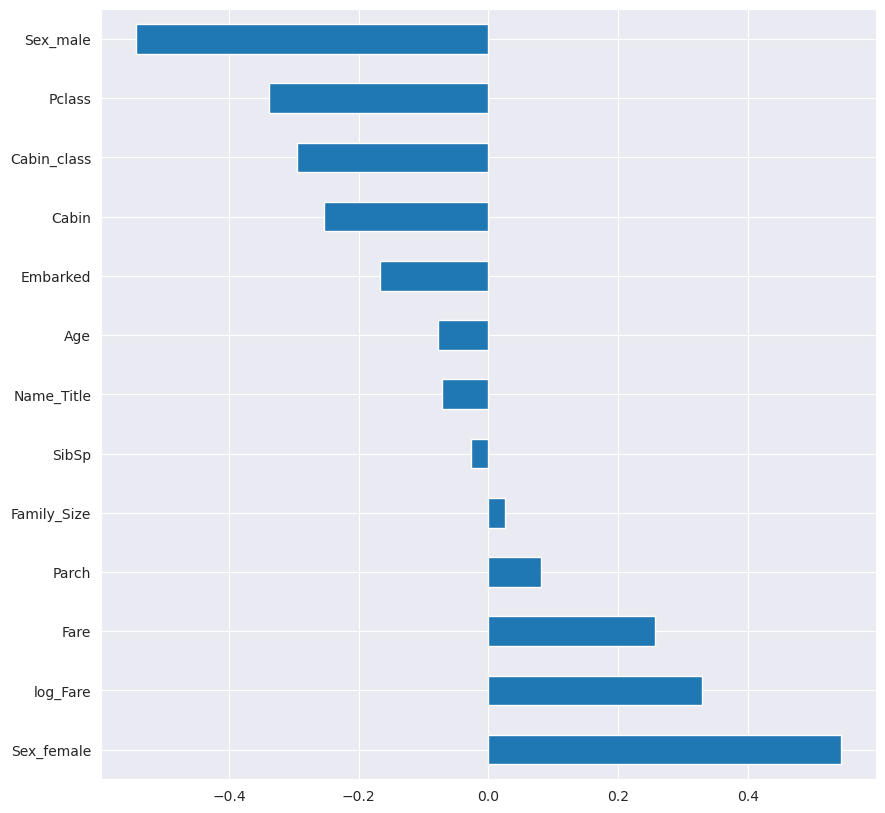

In [974]:
# Check correlation of variables with the target variable
plot_corr_target(df_train_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1), 'Survived')

<div class="col-md-8">
    <h3 id="section6">6. Model Building</h3>
    <p>Let's build a model to predict the Survival of passengers on the Titanic:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1059]:
# We will first separate the target variable from the features
y = df_train_encoded['Survived']
x = df_train_encoded.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'SibSp', 'Cabin', 'Fare'], axis=1)
x.shape, y.shape

((891, 10), (891,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [1122]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [1123]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [1124]:
# Check data after scaling
x.head()

,Pclass,Age,Parch,Embarked,Name_Title,log_Fare,Family_Size,Cabin_class,Sex_female,Sex_male
0,1.0,0.271174,0.0,1.0,0.50,0.338125,0.125,0.875,0.0,1.0
1,0.0,0.472229,0.0,0.0,0.75,0.685892,0.125,0.250,1.0,0.0
2,1.0,0.321438,0.0,1.0,0.25,0.350727,0.000,0.875,1.0,0.0
3,0.0,0.434531,0.0,1.0,0.75,0.639463,0.125,0.250,1.0,0.0
4,1.0,0.434531,0.0,1.0,0.50,0.352955,0.000,0.875,0.0,1.0


<p>Now, let's split the dataset into training and test sets:</p>

In [1125]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50 , stratify=y, test_size=0.3)


<div class="col-md-8">
    <h3 id="section7">7. Model Generation and Evaluation</h3>
    <p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
    <h4 id="sub_section2_1">i. KNN Classifier</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1126]:
# Import KNN classifier and metric F1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

<p>Let's use KNN classifier to build a model and check consistency using cross validation:</p>

In [1127]:
from sklearn.model_selection import cross_val_score
# Function to cross validation for different values of k

def cross_val_knn(n_neighbors):
    '''Takes in a value of k and returns the average and standard deviation of the F1 score for 10-fold cross validation'''
    average = []
    std = []
    for i in n_neighbors:
        knn = KNN(n_neighbors=i)
        scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
        average.append(scores.mean())
        std.append(scores.std())
    return average, std

In [1128]:
# Let's check the scores for a range of k values
n_neighbors = range(1,50)
mean, std = cross_val_knn(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

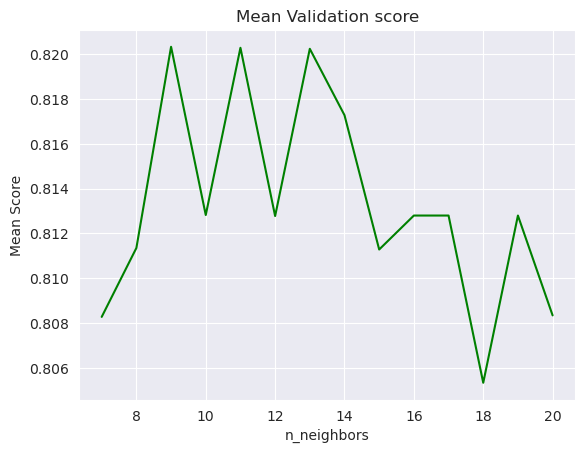

In [1129]:
# Let's plot the average F1 score for each value of k
sns.set_style('darkgrid')
plt.plot(n_neighbors[6:20], mean[6:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

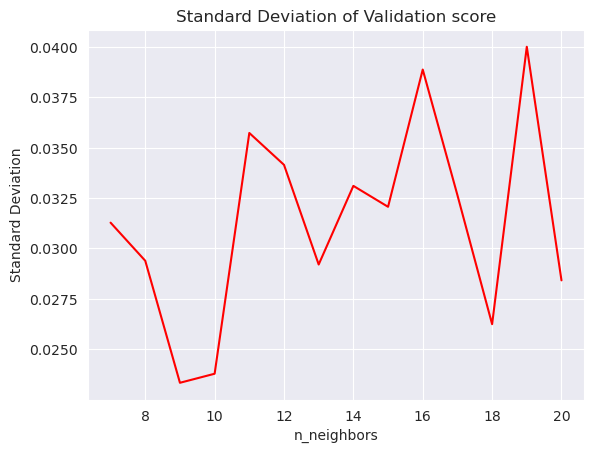

In [1130]:
# Let's plot the standard deviation of the F1 score for each value of k
plt.plot(n_neighbors[6:20], std[6:20], color = 'red', label = 'std' )
plt.xlabel('n_neighbors')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Validation score')

In [1141]:
# Try fiiting the model on the test set
knn = KNN(n_neighbors=8)
knn.fit(train_x, train_y)

# Predict on the train set
score1 = knn.score(train_x, train_y)

# Predict on the test set
score2 = knn.score(test_x, test_y)

print('Train score: ', score1)
print('Test score: ', score2)


Train score:  0.8383233532934131
Test score:  0.8295964125560538


In [1142]:
train_x.shape

(668, 10)

In [1143]:
# Let's see if df_test_encoded has all the columns as train_x, if not, we will add them
for i in train_x.columns:
    if i not in df_test_encoded.columns:
        df_test_encoded[i] = 0

In [1144]:
df_test_encoded_dropped = df_test_encoded.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Cabin', 'Fare'], axis=1)
df_test_encoded_dropped.shape

(418, 10)

In [1145]:
test_scaled = scaler.fit_transform(df_test_encoded_dropped)
df_test_scaled = pd.DataFrame(test_scaled, columns= df_test_encoded_dropped.columns)
submission_predictions = knn.predict(df_test_scaled)

# train_x.shape, df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1).shape

In [1146]:
train_x.shape, test_x.shape, df_test_encoded_dropped.shape

((668, 10), (223, 10), (418, 10))

In [1147]:
submission_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1148]:
df_submission['Survived_knn'] = submission_predictions

In [1149]:
df_submission.head()

,PassengerId,Survived,Survived_knn,Survived_dt,Survived_mlpc,Survived_svc
0,892,0,0,0,0,0
1,893,1,1,1,0,1
2,894,0,0,0,0,0
3,895,0,0,0,0,0
4,896,1,1,1,0,1


In [1150]:
df_submission.to_csv('submission.csv', index=False)

<div class="col-md-8">
    <h4 id="sub_section2_2">ii. Logistic Regression</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1151]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [1152]:
# Creating instance of Logistic Regression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_log = log_reg.predict(test_x)
k_log = accuracy_score(test_predict_log, test_y)

print('Accuracy Score    ', k_log )

Accuracy Score     0.7937219730941704


In [1153]:
submission_predictions_log = log_reg.predict(df_test_scaled)

In [1154]:
submission_predictions_log

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1155]:
# Combine predics with df_submission and save to csv
df_submission['Survived_log'] = submission_predictions_log
# df_submission.to_csv('submission_log.csv', index=False)

<div class="col-md-8">
    <h4 id="sub_section2_3">iii. Decision Tree Classifier</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1156]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [1157]:
# Creating instance of Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=10)

# Fitting the model
clf.fit(train_x, train_y)

# Predict on the train set
score1 = clf.score(train_x, train_y)

# Predict on the test set
score2 = clf.score(test_x, test_y)

# Predicting over the Test Set and calculating F1
test_predict_dt = clf.predict(test_x)
k_dt = accuracy_score(test_predict_dt, test_y)

print('Accuracy Score 1   ', score1 )
print('Accuracy Score 2   ', score2)
print('Accuracy Score    ', k_dt )

Accuracy Score 1    0.8293413173652695
Accuracy Score 2    0.7982062780269058
Accuracy Score     0.7982062780269058


In [1158]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(test_x, test_y))

In [1159]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.793413,0.766816
1,2,0.793413,0.766816
2,3,0.829341,0.798206
3,4,0.847305,0.784753
4,5,0.863772,0.789238


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


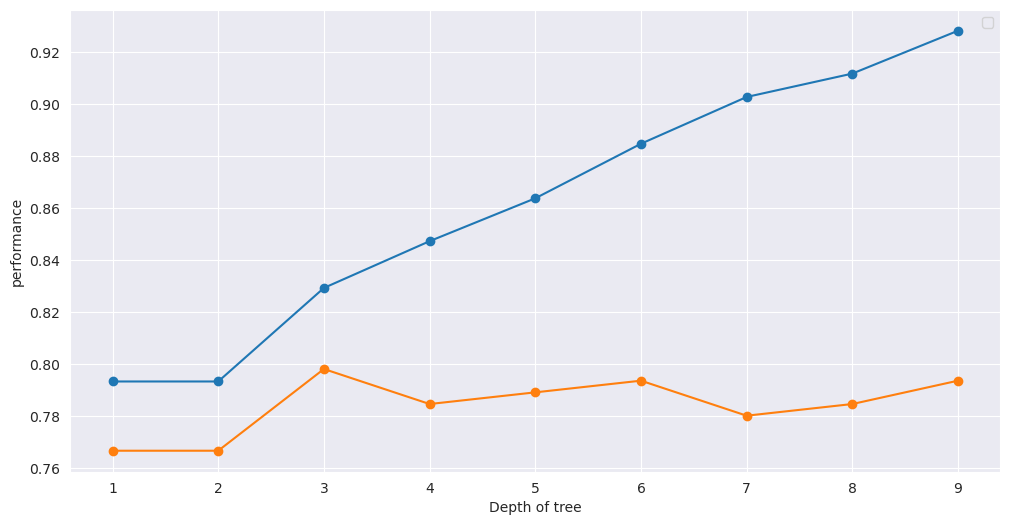

In [1160]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [1161]:
from sklearn import tree
!pip install graphviz

In [1162]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=3,filled=True)

In [1163]:
!dot -Tpng tree.dot -o tree.png

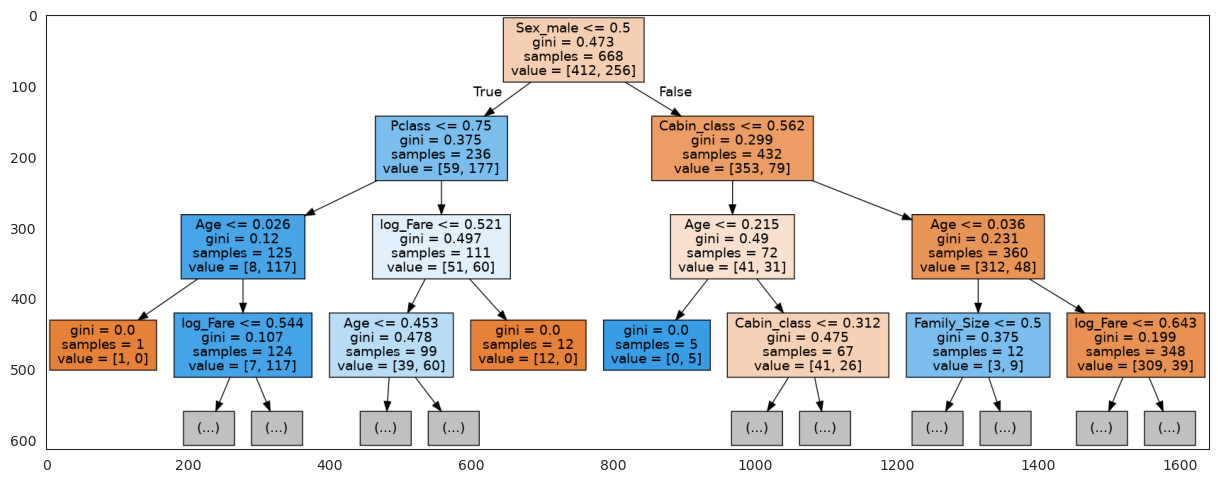

In [1164]:
image = plt.imread('tree.png')
sns.set_style('white')
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

In [1165]:
df_test_scaled.head(2)

,Pclass,Age,Parch,Embarked,Name_Title,log_Fare,Family_Size,Cabin_class,Sex_female,Sex_male
0,1.0,0.452723,0.0,0.5,0.50,0.348997,0.000,1.0,0.0,1.0
1,1.0,0.617566,0.0,1.0,0.75,0.333195,0.125,1.0,1.0,0.0


In [1166]:
submission_predictions_dt = clf.predict(df_test_scaled)

# 

In [1167]:
# Combine predictions with df_submission and save to csv
df_submission['Survived_dt'] = submission_predictions_dt
# df_submission.to_csv('submission_dt.csv', index=False)

<div class="col-md-8">
    <h4 id="sub_section2_4">iv. MLPC Classifier</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1178]:
# Importing MLPC Classifier
from sklearn.neural_network import MLPClassifier

In [1179]:
# Creating instance of MLPC Classifier
clf = MLPClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_mlpc = clf.predict(test_x)
k_mlpc = accuracy_score(test_predict_mlpc, test_y)

print('Accuracy Score    ', k_mlpc )

Accuracy Score     0.8251121076233184


In [1180]:
submission_predictions_mlpc = clf.predict(df_test_scaled)

In [1171]:
# Combine predictions with df_submission and save to csv
df_submission['Survived_mlpc'] = submission_predictions_mlpc
# df_submission.to_csv('submission_mlpc.csv', index=False)

In [1181]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [1222]:
# Creating instance of Random Forest Classifier
clf = RandomForestClassifier(max_depth=5, random_state=30, n_estimators=100)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_rf = clf.predict(test_x)
k_rf = accuracy_score(test_predict_rf, test_y)

print('Accuracy Score    ', k_rf )

Accuracy Score     0.8251121076233184


<div class="col-md-8">
    <h4 id="sub_section2_5">v. Support Vector Machine</h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [1172]:
# Importing Support Vector Classifier
from sklearn.svm import SVC

In [1173]:
# Creating instance of Support Vector Classifier
clf = SVC()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_svc = clf.predict(test_x)
k_svc = accuracy_score(test_predict_svc, test_y)

print('Accuracy Score    ', k_svc )

Accuracy Score     0.8295964125560538


In [1225]:
# Write the code here to perform the grid search and finalize the SVC model
from sklearn.model_selection import GridSearchCV

# Creating instance of Support Vector Classifier
clf = SVC()

# Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12],
            'kernel': ['linear','rbf'],
            'gamma': [0.1,0.2,0.3,0.4,0.5,0.6]
            }

# Making models with hyper parameters sets
model1 = GridSearchCV(clf, param_grid=params, n_jobs=-1)

# Learning
model1.fit(train_x, train_y)

# The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

# Prediction
prediction=model1.predict(test_x)

# Use accuracy_score function to get the accuracy
print("Accuracy Score:",accuracy_score(prediction,test_y))

Best Hyper Parameters:
 {'C': 6, 'gamma': 0.3, 'kernel': 'rbf'}
Accuracy Score: 0.8295964125560538


In [1174]:
submission_predictions_svc = clf.predict(df_test_scaled)

# Combine predictions with df_submission and save to csv
df_submission['Survived_svc'] = submission_predictions_svc

In [1175]:
df_submission.drop(['Survived_log'], axis=1, inplace=True)

In [1176]:
df_submission.head(20)

,PassengerId,Survived,Survived_knn,Survived_dt,Survived_mlpc,Survived_svc
0,892,0,0,0,0,0
1,893,1,1,1,0,1
2,894,0,0,0,0,0
3,895,0,0,0,0,0
4,896,1,1,1,0,1
5,897,0,0,0,0,0
6,898,1,1,1,1,1
7,899,0,0,0,0,0
8,900,1,1,1,1,1
9,901,0,0,0,0,0


In [1120]:
# Calculate the Survived column by taking the mode of the other 3 columns
df_submission['Survived'] = df_submission[['Survived_knn', 'Survived_mlpc', 'Survived_svc']].mode(axis=1)
df_submission.head(20)

,PassengerId,Survived,Survived_knn,Survived_dt,Survived_mlpc,Survived_svc
0,892,0,0,0,0,0
1,893,1,1,1,0,1
2,894,0,0,0,0,0
3,895,0,0,0,0,0
4,896,1,1,1,0,1
5,897,0,0,0,0,0
6,898,1,1,1,1,1
7,899,0,0,0,0,0
8,900,1,1,1,1,1
9,901,0,0,0,0,0


In [1121]:
df_submission[['PassengerId', 'Survived']].to_csv('submission_ensemble.csv', index=False)

In [1235]:
# IMport Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Creating instance of Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=200, subsample=0.7, min_samples_split=100, max_depth=3, random_state=30)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating accuracy
test_predict_gbc = clf.predict(test_x)
k_gbc = accuracy_score(test_predict_gbc, test_y)

print('Accuracy Score    ', k_gbc )

Accuracy Score     0.8385650224215246


In [1238]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1242]:
# IMport Xtreme Gradient Boosting Classifier
from xgboost import XGBClassifier

# Creating instance of Gradient Boosting Classifier
clf = XGBClassifier(random_state=30)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating accuracy
test_predict_xgbc = clf.predict(test_x)

k_xgbc = accuracy_score(test_predict_xgbc, test_y)

print('Accuracy Score    ', k_xgbc )

Accuracy Score     0.8295964125560538


In [1253]:
# Import Adaboost Claasifier
from sklearn.ensemble import AdaBoostClassifier

# Creating instance of Adaboost classifier
clf = AdaBoostClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the TEst set and calculate the accuracy
test_predict_ada = clf.predict(test_x)

k_ada = accuracy_score(test_predict_ada, test_y)

print("Accuracy Score:  ", k_ada)

Accuracy Score:   0.8295964125560538


In [1254]:
df_submission['Survived'] = clf.predict(df_test_encoded_dropped)

df_submission[['PassengerId', 'Survived']].to_csv("submission_ada.csv", index=False)